## Projeto de Classificação de Galáxias com Aprendizado de Máquina Tradicional 🛰️
### Descrição do Projeto
Este projeto tem como objetivo aplicar técnicas de Aprendizado de Máquina tradicional para realizar a classificação de galáxias com base em características numéricas disponibilizadas pelo projeto Galaxy Zoo.

O Galaxy Zoo é uma iniciativa de ciência cidadã que reúne milhares de imagens de galáxias do universo, classificadas por voluntários com base em suas formas visuais (espirais, elípticas, etc.). Em vez de trabalhar com as imagens, este projeto utiliza apenas os dados estruturados no arquivo CSV, que contém as características extraídas dessas imagens, já prontas para análise.

Class1.1 – Probabilidade de a galáxia ser suave (smooth), geralmente elípticas.

Class1.2 – Probabilidade de a galáxia apresentar estrutura (features/disk), geralmente espirais.

Class1.3 – Probabilidade de a imagem representar uma estrela ou artefato, e não uma galáxia real.

Fonte: Kaggle – Galaxy Zoo: The Galaxy Challenge  
Link: https://www.kaggle.com/datasets/ntnu-testimon/galaxy-zoo-the-galaxy-challenge


In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("training_solutions_rev1.csv")

df.head()


,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,...,Class9.3,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6
0,100008,0.383147,0.616853,0.000000,0.000000,0.616853,0.038452,0.578401,0.418398,0.198455,...,0.000000,0.279952,0.138445,0.000000,0.000000,0.092886,0.0,0.0,0.0,0.325512
1,100023,0.327001,0.663777,0.009222,0.031178,0.632599,0.467370,0.165229,0.591328,0.041271,...,0.018764,0.000000,0.131378,0.459950,0.000000,0.591328,0.0,0.0,0.0,0.000000
2,100053,0.765717,0.177352,0.056931,0.000000,0.177352,0.000000,0.177352,0.000000,0.177352,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
3,100078,0.693377,0.238564,0.068059,0.000000,0.238564,0.109493,0.129071,0.189098,0.049466,...,0.000000,0.094549,0.000000,0.094549,0.189098,0.000000,0.0,0.0,0.0,0.000000
4,100090,0.933839,0.000000,0.066161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000


In [41]:
import pandas as pd

# Carregar o dataset original
df = pd.read_csv("training_solutions_rev1.csv")

# Renomear as colunas para nomes mais legíveis
df_renomeado = df.rename(columns={
    "Class1.1": "eliptica",
    "Class1.2": "espiral",
    "Class1.3": "nao_galaxia"
})

# (Opcional) Criar a coluna de classe mais provável com base nas probabilidades
df_renomeado["classe"] = df_renomeado[["eliptica", "espiral", "nao_galaxia"]].idxmax(axis=1)

# Salvar em um novo arquivo CSV
df_renomeado.to_csv("dados_transformados.csv", index=False)

print("Arquivo salvo")


Arquivo salvo


In [44]:
import pandas as pd

# Carregar o novo arquivo com colunas renomeadas
df = pd.read_csv("dados_transformados.csv")

# Selecionar apenas as colunas de probabilidade
df_class1 = df[['eliptica', 'espiral', 'nao_galaxia']]

# Exibir estatísticas descritivas dessas colunas
print(df_class1.describe())


           eliptica       espiral   nao_galaxia
count  61578.000000  61578.000000  61578.000000
mean       0.432526      0.542261      0.025213
std        0.283517      0.296429      0.037967
min        0.000000      0.000000      0.000000
25%        0.175812      0.280862      0.000000
50%        0.416994      0.558754      0.014870
75%        0.679182      0.811339      0.034325
max        1.000000      1.000000      0.935147


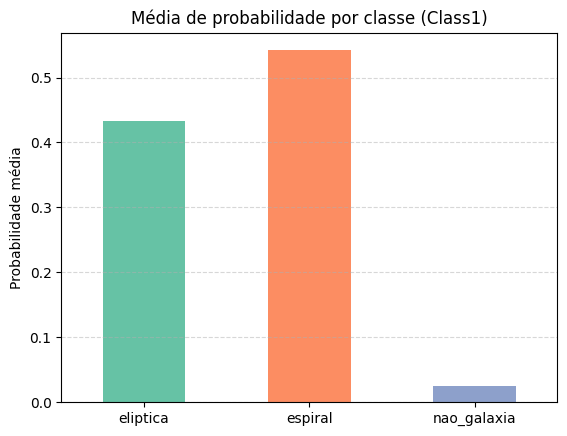

In [45]:
# Média de cada classe
df_class1.mean().plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title("Média de probabilidade por classe (Class1)")
plt.ylabel("Probabilidade média")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()



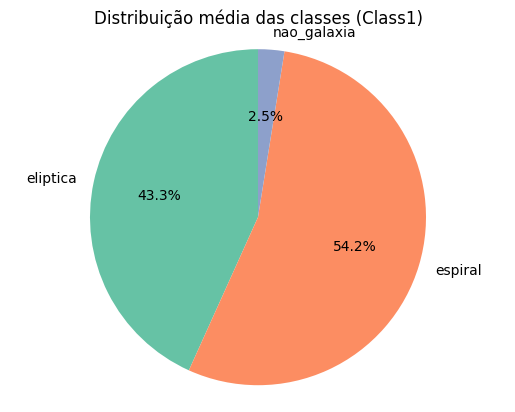

In [ ]:
# Médias para gráfico de pizza
means = df_class1.mean()
plt.pie(means, labels=means.index, autopct='%1.1f%%', startangle=90, colors=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title("Distribuição média das classes")
plt.axis('equal')  
plt.show()


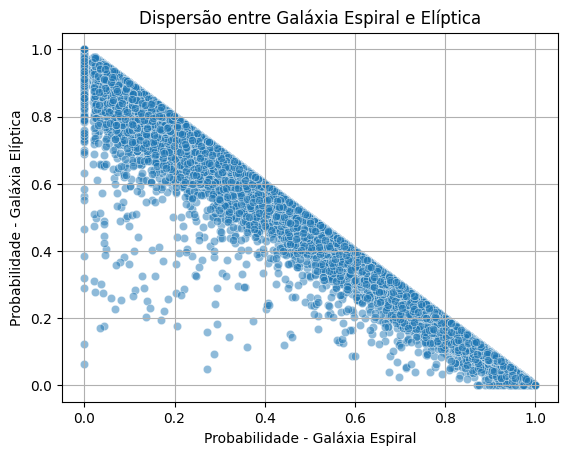

In [47]:

# Gráfico de dispersão entre espiral e elíptica
sns.scatterplot(data=df, x='espiral', y='eliptica', alpha=0.5)
plt.title("Dispersão entre Galáxia Espiral e Elíptica")
plt.xlabel("Probabilidade - Galáxia Espiral")
plt.ylabel("Probabilidade - Galáxia Elíptica")
plt.grid(True)
plt.show()


In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv("dados_transformados.csv")

class_cols = ["eliptica", "espiral", "nao_galaxia"]

print("Valores nulos:\n", df[class_cols].isnull().sum())


df['classe_final'] = df[class_cols].idxmax(axis=1)

mapeamento = {
    "eliptica": "Elíptica",
    "espiral": "Espiral",
    "nao_galaxia": "Não-Galáxia"
}
df['classe_final'] = df['classe_final'].map(mapeamento)

print("\nDistribuição das classes:\n", df['classe_final'].value_counts())


Valores nulos:
 eliptica       0
espiral        0
nao_galaxia    0
dtype: int64

Distribuição das classes:
 classe_final
Espiral        34826
Elíptica       26693
Não-Galáxia       59
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split

# Features (X) e target (y)
X = df[class_cols]             
y = df['classe_final']         

# Dividir em treino e teste (70% treino, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("\nTamanho do conjunto de treino:", X_train.shape)
print("Tamanho do conjunto de teste:", X_test.shape)



Tamanho do conjunto de treino: (43104, 3)
Tamanho do conjunto de teste: (18474, 3)


In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [52]:
# Modelo 1: Regressão Logística
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
acc_log = accuracy_score(y_test, y_pred_log)

# Modelo 2: Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)


In [53]:
print(f"Acurácia - Regressão Logística: {acc_log:.2f}")
print(f"Acurácia - Random Forest: {acc_rf:.2f}")



Acurácia - Regressão Logística: 1.00
Acurácia - Random Forest: 1.00


In [54]:
if acc_log > acc_rf:
    print("O modelo Regressão Logística teve melhor desempenho.")
else:
    print("O modelo Random Forest teve melhor desempenho.")


O modelo Random Forest teve melhor desempenho.


In [61]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

df = pd.read_csv("dados_transformados.csv")

class_cols = ["eliptica", "espiral", "nao_galaxia"]
X = df[class_cols]

df['classe_final'] = df[class_cols].idxmax(axis=1)

mapeamento = {
    "eliptica": "Elíptica",
    "espiral": "Espiral",
    "nao_galaxia": "Não-Galáxia"
}
df['classe_final'] = df['classe_final'].map(mapeamento)

y = df['classe_final']

rf_accuracies = []
knn_accuracies = []

for seed in range(30):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

  
    rf_model = RandomForestClassifier(random_state=seed)
    rf_model.fit(X_train, y_train)
    rf_preds = rf_model.predict(X_test)
    rf_accuracies.append(accuracy_score(y_test, rf_preds))

    
    knn_model = KNeighborsClassifier()
    knn_model.fit(X_train, y_train)
    knn_preds = knn_model.predict(X_test)
    knn_accuracies.append(accuracy_score(y_test, knn_preds))

rf_mean = np.mean(rf_accuracies)
rf_std = np.std(rf_accuracies)
knn_mean = np.mean(knn_accuracies)
knn_std = np.std(knn_accuracies)

print("\n=== Resultados após 30 execuções ===")
print(f"Random Forest - Média: {rf_mean:.4f}, Desvio Padrão: {rf_std:.4f}")
print(f"KNN           - Média: {knn_mean:.4f}, Desvio Padrão: {knn_std:.4f}")

if rf_mean > knn_mean:
    print("\nO modelo Random Forest teve maior taxa de acerto.")
else:
    print("\nO modelo KNN teve maior taxa de acerto.")

if rf_std < knn_std:
    print("O modelo Random Forest foi mais estável (menor desvio padrão).")
else:
    print("O modelo KNN foi mais estável (menor desvio padrão).")



=== Resultados após 30 execuções ===
Random Forest - Média: 0.9993, Desvio Padrão: 0.0002
KNN           - Média: 0.9993, Desvio Padrão: 0.0002

O modelo Random Forest teve maior taxa de acerto.
O modelo KNN foi mais estável (menor desvio padrão).


In [ ]:
import pickle


melhor_modelo = RandomForestClassifier()
melhor_modelo.fit(X, y)  

with open('melhor_modelo.pkl', 'wb') as f:
    pickle.dump(melhor_modelo, f)

print("Modelo salvo com sucesso como 'melhor_modelo.pkl'")


Modelo salvo com sucesso como 'melhor_modelo.pkl'


In [ ]:
import gradio as gr
import pickle
import pandas as pd

with open("melhor_modelo.pkl", "rb") as f:
    modelo = pickle.load(f)

def prever_galaxia(eliptica, espiral, nao_galaxia):
    try:
        
        eliptica = eliptica.replace(",", ".")
        espiral = espiral.replace(",", ".")
        nao_galaxia = nao_galaxia.replace(",", ".")

        p1 = float(eliptica)
        p2 = float(espiral)
        p3 = float(nao_galaxia)


        for p in [p1, p2, p3]:
            if not 0 <= p <= 1:
                return "❌ Os valores devem estar entre 0 e 1."
            
        soma = p1 + p2 + p3
        if not (0.95 <= soma <= 1.05):
            return f"⚠️ A soma das probabilidades deve ser aproximadamente 1. Soma atual: {soma:.2f}"

        entrada = pd.DataFrame([[p1, p2, p3]], columns=["eliptica", "espiral", "nao_galaxia"])
        pred = modelo.predict(entrada)[0]

        return f"✅ Classe prevista: {pred}"
    except Exception as e:
        return f"❌ Erro: {str(e)}"

interface = gr.Interface(
    fn=prever_galaxia,
    inputs=[
        gr.Textbox(label="Probabilidade Elíptica", placeholder="Ex: 0.2"),
        gr.Textbox(label="Probabilidade Espiral", placeholder="Ex: 0.7"),
        gr.Textbox(label="Probabilidade Não Galáxia", placeholder="Ex: 0.1"),
    ],
    outputs="text",
    title="Classificação de Galáxias com IA",
    description="""
🔭 Este sistema prevê o tipo de galáxia com base nas probabilidades de cada classe.

✅ Digite valores entre 0 e 1 para:
- Elíptica
- Espiral
- Não Galáxia

📌 A soma deve ser próxima de 1. Exemplo:
- Elíptica: 0.2
- Espiral: 0.7
- Não Galáxia: 0.1
"""
)

interface.launch()


* Running on local URL:  http://127.0.0.1:7877
* To create a public link, set `share=True` in `launch()`.
